In [1]:
import os
import requests

In [2]:
import rioxarray as riox
from rasterio.plot import show

In [3]:
import datetime
from tqdm import tqdm

In [4]:
url = r'http://www.northwestknowledge.net/metdata/data/pr_2020.nc'
response = requests.get(url)
response.status_code

200

In [5]:
outPATH = os.path.join("/90daydata/cper_neon_aop/prism/", "pr_2020.nc")
with open(outPATH, mode="wb") as file:
    file.write(response.content)

In [6]:
import xarray as xr

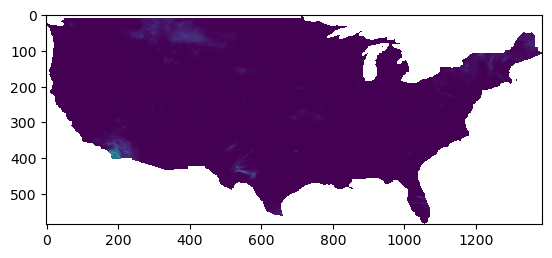

<AxesSubplot:>

In [10]:
da = xr.open_dataset(outPATH).squeeze()
show(da.isel(day=100)['precipitation_amount'].data)

In [ ]:
for yr in range(2018, 2026):
    print(yr)
    for d in tqdm(range(60, 300)):
        date = datetime.datetime(yr, 1, 1) + datetime.timedelta(days=d)
        if date > datetime.datetime.now():
            break
        else:
            date_str = date.strftime("%Y-%m-%dT%H:%M:%S.%fZ")
            date_str_short = date.strftime("%Y%m%d")
            
            url = r'https://geoserver.usanpn.org/geoserver/wcs?service=WCS&version=2.0.1&request=GetCoverage&coverageId=gdd:agdd&SUBSET=time("{}")&format=image/geotiff'.format(date_str)
            
            response = requests.get(url)
            
            outPATH = os.path.join("/90daydata/cper_neon_aop/npn/agdd/", "agdd_" + date_str_short + '.tif')
            
            with open(outPATH, mode="wb") as file:
                file.write(response.content)

2018


 10%|█         | 25/240 [00:43<07:31,  2.10s/it]

In [99]:
da = riox.open_rasterio("/90daydata/cper_neon_aop/npn/test3.tif")
da

<xarray.DataArray (band: 1, y: 1228, x: 2606)>
[3200168 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -125.0 -125.0 -125.0 ... -66.54 -66.51 -66.49
  * y            (y) float64 49.93 49.91 49.88 49.86 ... 24.14 24.12 24.09 24.07
    spatial_ref  int64 0
Attributes:
    _FillValue:    -9999.0
    scale_factor:  1.0
    add_offset:    0.0

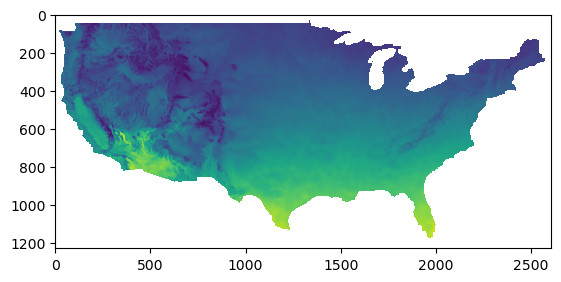

<AxesSubplot:>

In [64]:
show(da.data)